In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import mode_decomposition as md
import myplot

In [2]:
# parameters
D       = 196.5;    # Model diameter in mm
Uinf    = 15;       # Nominal free stream velocity
fPIV    = 720;      # PIV sampling frequency
dt      = 1/fPIV;   # Delta t between image pairs

In [38]:
#=================== downsampled data ======================
filename = "./PIV4_downsampled_by8.h5" # .h5 file of data
hf = h5py.File(filename,'r')
z = np.array(hf.get('z'))
y = np.array(hf.get('y'))
vy = np.array(hf.get('vy'))
vz = np.array(hf.get('vz'))
hf.close()
print("Finished loading data.")
# print(vy.shape)
[nt,nz,ny] = vz.shape

vy = np.transpose(vy,[2,1,0])
vz = np.transpose(vz,[2,1,0]) #(ny,nz,nt)
X = np.vstack((vz,vy)) # new shape [2*ny,nz,nt]
print(X.shape)

Finished loading data.
(42, 24, 2732)


Finished loading data.
10 600 21 24 2


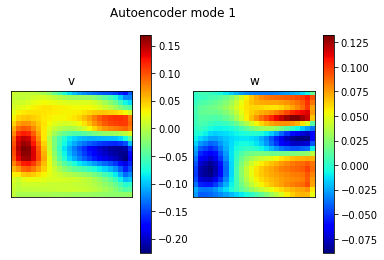

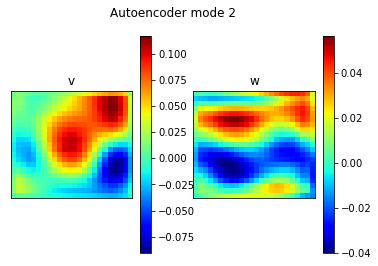

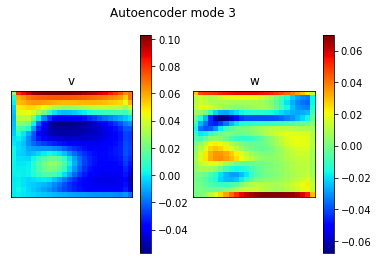

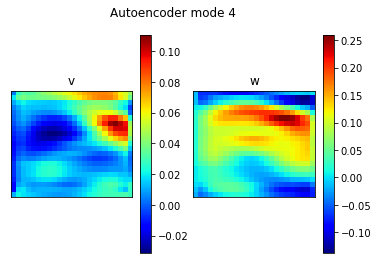

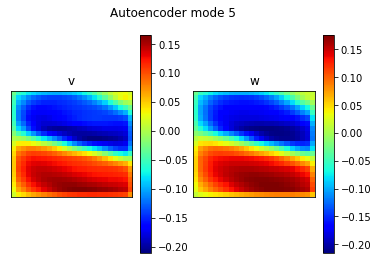

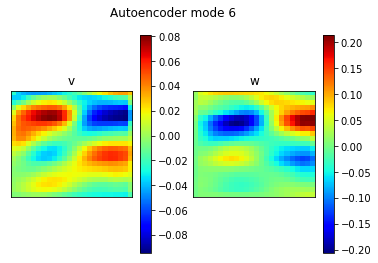

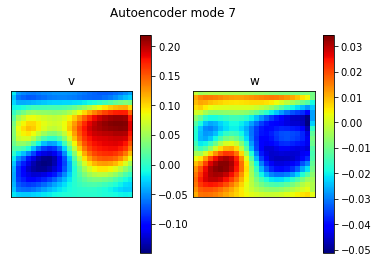

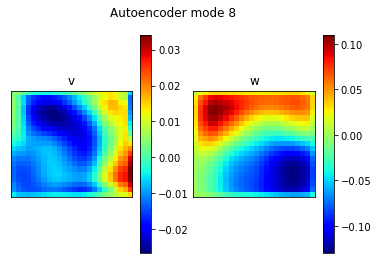

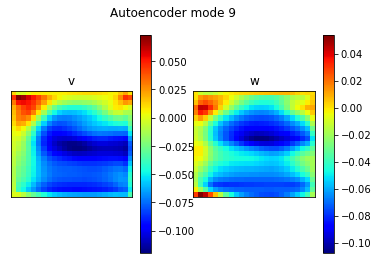

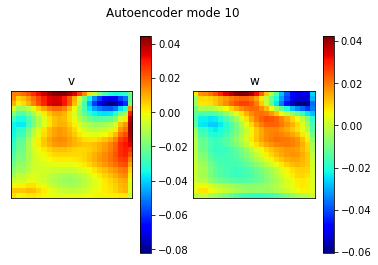

In [52]:
#================= autoencoder data ========================
folder = '/home/ym917/OneDrive/PhD/Code_md-ae/MD_10__2022_05_06__12_47_36/'
filename = folder + 'results.h5'
hf = h5py.File(filename,'r')
decomp_test = np.array(hf.get('modes_test'))
hf.close()
print("Finished loading data.")
[latent_dim,nt,ny,nz,nu] = decomp_test.shape
print(latent_dim,nt,ny,nz,nu)

myplot.plot_ae_modes(decomp_test,range(10),snapshot=460)

In [47]:
WhichDecoder = 9
vy = decomp_test[WhichDecoder,:,:,:,0].astype('float64')
vy = np.transpose(vy,[1,2,0])
vz = decomp_test[WhichDecoder,:,:,:,1].astype('float64')
vz = np.transpose(vz,[1,2,0]) #(ny,nz,nt)
X = np.vstack((vz,vy)) # new shape [2*ny,nz,nt]
print(X.shape)

(42, 24, 600)


In [51]:
print(np.all((vy == 0)))
print(np.all((vz == 0)))
print(np.all((X == 0)))
X.shape
print(X[:5,0,60])
print(X[:5,0,599])

False
False
False
[ 0.00781965 -0.00459524 -0.0047869  -0.01024675 -0.01366963]
[ 0.00781965 -0.00459524 -0.0047869  -0.01024675 -0.01366963]


In [35]:
Q = np.copy(X)
Q = np.reshape(Q,(-1,600))
print(Q.shape)
print(Q[:5,3])
Q_mean = np.mean(Q,axis=1)
print(Q_mean.shape)
print(Q_mean[:5])
for ti in range(0,nt):
    Q[:,ti] = Q[:,ti] - Q_mean;

print(np.all((Q == 0)))

(1008, 600)
[-0.00870131 -0.01278622 -0.01044397 -0.00593962 -0.00331646]
(1008,)
[-0.00870131 -0.01278622 -0.01044397 -0.00593962 -0.00331646]
True


In [29]:
Q

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## POD

In [9]:
pod = md.POD(X)
Q_POD,lam = pod.get_modes()
Q_mean = pod.Q_mean

Calculating POD ...
Use snapshot POD, Nx > Nt.
POD done.


/home/ym917/Documents/Codes/MD-CNN-AE/mode_decomposition.py:202: RuntimeWarning: divide by zero encountered in true_divide
  Q_POD = (Q@Phi)*(1/(lam**0.5).T)
/home/ym917/Documents/Codes/MD-CNN-AE/mode_decomposition.py:202: RuntimeWarning: invalid value encountered in multiply
  Q_POD = (Q@Phi)*(1/(lam**0.5).T)


In [10]:
lam

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

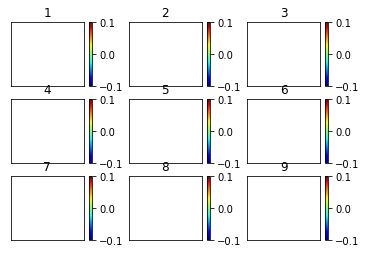

/tmp/ipykernel_106357/788559554.py:31: RuntimeWarning: invalid value encountered in true_divide
  energy = np.cumsum(lam/np.sum(lam))


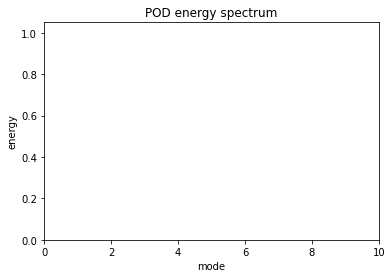

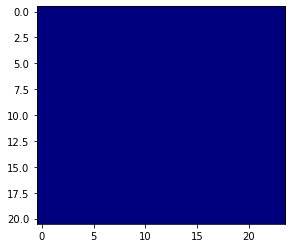

snapshot


In [45]:
#======================= plot ==============================

## Modes
PlotWhichVelocity = 'v' 
save_img = False

fig = plt.figure(1)
title = "POD Modes " + PlotWhichVelocity + " in decoder " + str(WhichDecoder+1)
# title = "POD Modes "+PlotWhichVelocity
# plt.suptitle(title)
for iphi in range(9):
    ax = plt.subplot(3,3,iphi+1,title=str(iphi+1),xticks=[],yticks=[])
    pltV = Q_POD[:,iphi];
    pltV = np.reshape(pltV,[2*ny,nz])
    if PlotWhichVelocity == 'w': # Q was built [vz,vy]
        pltV = pltV[0:ny,:]
    elif PlotWhichVelocity == 'v':
        pltV = pltV[ny:,:]
    elif PlotWhichVelocity == 'V':
        pltV = (pltV[0:ny,:]**2 + pltV[ny:,:]**2)**0.5
    
    ax = plt.imshow(pltV,'jet')
    plt.colorbar()
if save_img:
    p = folder + "POD_modes_" + str(WhichDecoder+1) + PlotWhichVelocity + ".png"
    plt.savefig(p)
else:
    plt.show()

## Spectrum
energy = np.cumsum(lam/np.sum(lam))
plt.figure()
plt.title('POD energy spectrum')
plt.plot(np.arange(len(energy))+1,energy)
plt.ylabel('energy')
plt.xlabel('mode')
plt.xlim([0,10])
plt.ylim([0,1.05])
if save_img:
    p = folder + "POD_spectrum_" + str(WhichDecoder+1) + ".png"
    plt.savefig(p)
else:
    plt.show()

## Reconstruct
rebuildv = pod.reconstruct(number_of_modes=2,t=1,shape=[2,ny,nz])
if PlotWhichVelocity == 'w': # Q was built [vz,vy]
    rebuildv = rebuildv[0,:,:]
elif PlotWhichVelocity == 'v':
    rebuildv = rebuildv[1,:,:]
plt.figure()
plt.imshow(rebuildv.real,'jet')
plt.show()
print(pod.typePOD)

## DMD

In [46]:
dmd = md.DMD(X[:,:,:-1],X[:,:,1:],r=50,keep_shape=True)
Phi, Lambda, b = dmd.get_modes()
print(Phi.shape,Lambda.shape,b.shape)

Calculating DMD...


LinAlgError: Singular matrix

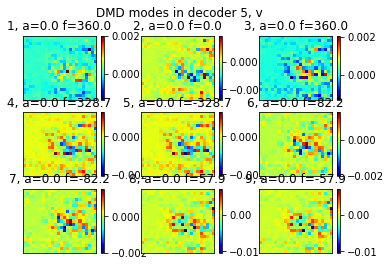

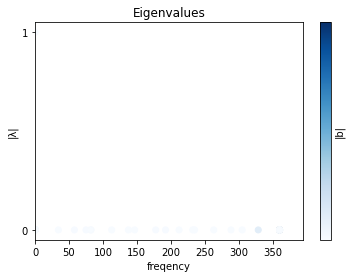

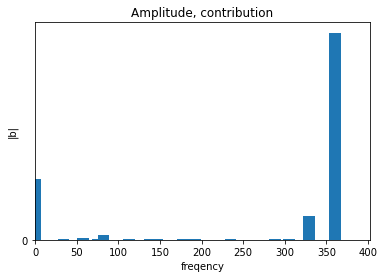

In [ ]:
#======================== Plot Mode =========================
mode_z = Phi[:ny,:,:].real # X was built vstack(vz,vy)
mode_y = Phi[ny:,:,:].real # has shape [ny,nz,modes]

whichmode = 0
whichvelocity = 'v'
save_img = False
# plot mean flow (b = 1.0)
# plt.figure()
# if whichvelocity == 'w':
#     plt.imshow(mode_z[:,:,whichmode],'jet')
# else:
#     plt.imshow(mode_y[:,:,whichmode],'jet')
# # plt.title('decoder '+str(WhichDecoder+1))
# plt.show()
# print(np.diag(Lambda)[whichmode])

plt.suptitle("DMD modes in decoder " + str(WhichDecoder+1) + ", " + whichvelocity)
# plt.suptitle("DMD modes "+ whichvelocity)
lam = np.diag(Lambda)
lam_r = np.abs(lam)
lam_f = np.angle(lam)/(2*np.pi)/dt
for i in range(9):
    title = str(i+1)+', a='+str(np.around(lam_r[i],decimals=2))+" f="+str(np.around(lam_f[i],1))
    ax = plt.subplot(3,3,i+1,title=title,xticks=[],yticks=[])
    if whichvelocity == 'w': # Q was built [vz,vy]
        pltV = mode_z[:,:,i]
    elif whichvelocity == 'v':
        pltV = mode_y[:,:,i]
    elif whichvelocity == 'V':
        pltV = (mode_z[:,:,i]**2 + mode_y[:,:,i]**2)**0.5
    
    ax = plt.imshow(pltV,'jet')
    plt.colorbar()
if save_img:
    p = folder + "DMD_modes_" + str(WhichDecoder+1) + whichvelocity + ".png"
    plt.savefig(p)
else:
    plt.show()


## eigenvalue plot, temporal behaviour
lam_r, lam_f = dmd.get_frequency(dt)
b_r = dmd.get_amplitude()
plt.figure()
plt.scatter(lam_f,lam_r,c=b_r,cmap='Blues',vmin=0,vmax=max(b_r))
plt.colorbar(label='|b|',ticks=[])
plt.xlabel('freqency')
plt.ylabel('|λ|')
plt.title('Eigenvalues')
plt.yticks([0,1])
# plt.hlines(1,0,360,colors='k',linestyles='dotted')
plt.xlim(left=0)
plt.show()

# ## plot amplitude
max_fq = max(lam_f)
plt.figure()
# plt.plot(lam_f_sorted,b_r_sorted)
plt.bar(lam_f,b_r,width=700/dmd.r)
plt.xlabel('freqency')
plt.ylabel('|b|')
plt.title('Amplitude, contribution')
# plt.xticks([])
plt.xlim(left=0)
plt.yticks([0])
if save_img:
    p = folder + "DMD_amp_" + str(WhichDecoder+1) + ".png"
    plt.savefig(p)
else:
    plt.show()

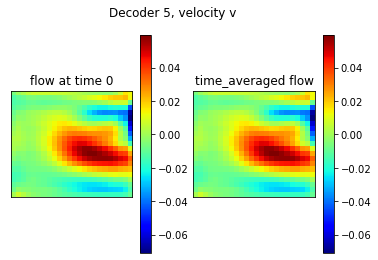

In [ ]:
#==================== actual flow =========================
time = 0
PlotWhichVelocity = 'v'

v = vy[:,:,time]
w = vz[:,:,time]
V = (v**2 + w**2)**0.5

fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.suptitle('Decoder '+str(WhichDecoder+1)+', velocity '+PlotWhichVelocity)
if PlotWhichVelocity == 'v':
    fig1 = ax1.imshow(v,'jet')
    fig2 = ax2.imshow(np.mean(vy,-1),'jet')
elif PlotWhichVelocity == 'w':
    ax1 = plt.imshow(w,'jet')
    ax2 = plt.imshow(np.mean(vz,-1),'jet')
elif PlotWhichVelocity == 'V':
    ax1= plt.imshow(V,'jet')
    ax2 = plt.imshow(np.mean(V,-1),'jet')
fig.colorbar(fig1,ax=ax1)
fig.colorbar(fig2,ax=ax2)
ax1.set_title('flow at time '+str(time))
ax2.set_title('time_averaged flow')
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
plt.show()
